In [0]:
#Joshua Alvarado
#Josh.alvarado0328@gmail.com

#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Twitter Api Credentials

Consumer_Key = ""

Consumer_Secret_Key = "4"

Access_Token = ""

Access_Token_Secret = ""

#uthenticating Keys

auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)

auth.set_access_token(Access_Token,Access_Token_Secret)

api = tweepy.API(auth, wait_on_rate_limit= True)

#Target term which is the the bot @name
target_term="@FindSentiment"



In [0]:
def create_visuals(mentioned):
    #Extract 100 tweets from user
    print("In create_visuals")
    if "#" in mentioned:
      print("we are in the hashtag zone")
      tweets = tweepy.Cursor(api.search,
              q=mentioned + "-filter:retweets",
              lang="en", result_type="recent").items(100)

      # Iterate and print tweets
      posts = [[tweet.text] for tweet in tweets]
      print(posts)
      for tweet in tweets:
          print(tweet.text)
      [tweet.text for tweet in tweets]
      df = pd.DataFrame(data=posts, 
                    columns=['tweets'])
      df    
    else:
      print("Does not include a hashtag")
      posts = api.user_timeline(screen_name=mentioned, count=100, lang= "en",tweet_mode="extended")
      print("Got the user tweets")
      df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['tweets'])
      df.head()
      df


    #Clean the text
    #Create a function to clean the tweets
    def cleanTxt(text):
      text = re.sub(r'@[\w:]+', '', text) #removes @mentions
      text = re.sub(r'#','',text) #removing # symbol
      text = re.sub(r'RT[\s]+','',text) #removes retweets
      text = re.sub(r'https?:\/\/\S+','', text) #remove hyperlinks
      return text

    df['tweets'] = df['tweets'].apply(cleanTxt)

    #Show the cleaned text
    df

    # Create a function to get the subjectivity
    def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity

    # Create a function to get the polarity
    def getPolarity(text):
      return TextBlob(text).sentiment.polarity

    # Create two new columns
    df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
    df['Polarity'] = df['tweets'].apply(getPolarity)

    # Show the new dataframe with the new columns



    #Create a function to compute the negative, neutral and positive analysis
    def getAnalysis(score):
      if score < 0:
        return 'Negative'
      elif score == 0:
        return 'Neutral'
      else:
        return 'Positive'

    df['Analysis'] = df['Polarity'].apply(getAnalysis)

    df

    # Plot the polarity and subjectivity 
    plt.figure(figsize=(8,6))
    for i in range(0, df.shape[0]):
      plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='blue')
      
    plt.title('Sentiment Analysis for ' + mentioned)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.savefig('plot.png',bbox_inches='tight',dpi=600)
    plt.show()

    # show the value counts

    df['Analysis'].value_counts()

    # plot and visualize the counts

    plt.title('Sentiment Analysis for ' + mentioned)
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.savefig('graph.png',bbox_inches='tight',dpi=600)
    plt.show()


    def forhashtags(text):
      #text = text.replace(text, text.lower())
      remove = re.sub(r'#','',mentioned) #removing # symbol from mentioned
      clean = re.compile(remove,flags=re.IGNORECASE)
      text = clean.sub('', text,)
      return text

        # Plot the Word Cloud
    df['tweets'] = df['tweets'].apply(forhashtags)
    df
    
    allWords = ' '.join([twts for twts in df ['tweets']])
    wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size=119,).generate(allWords)

    plt.imshow(wordCloud, interpolation = "bilinear")
    plt.axis('off')
    plt.title('Most common words for ' + mentioned)
    plt.savefig('wordcloud.png',bbox_inches='tight',dpi=600)
    plt.show()

    



@FindSentiment https://t.co/QlqCpjFaZq
under this
 https://t.co/qlqcpjfazq
Unbaptizedd
1272788058060910592
1272788058060910592
dis the handle
Unbaptizedd
 https://t.co/qlqcpjfazq
it has nothing
In create_visuals
Does not include a hashtag
Got the user tweets


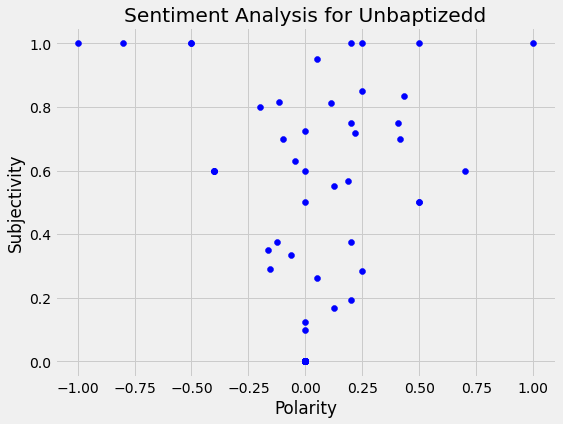

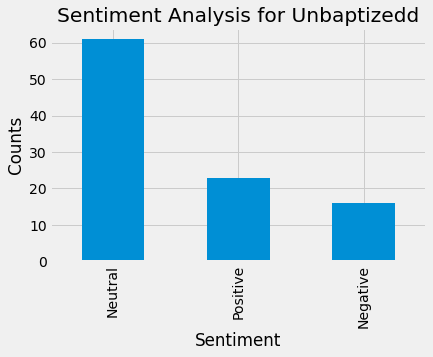

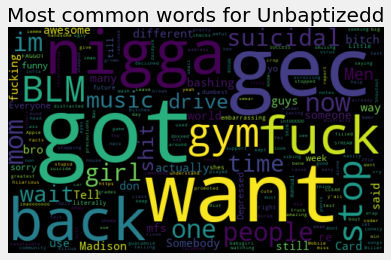

I should have images 
WE DID IT SUCCESS!


ProtocolError: ignored

In [0]:
class MyStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        global tweet_id
        global handle
        global text
        text = status.text
        text = re.sub(r'@findsentiment','',text.lower())
        tweet_id = status.id
        handle = status.user.screen_name 
        #status_id = status.id
        print(status.text)
        print("under this")
        print(text)
        print(handle)
        print(tweet_id)
        start(handle,text,tweet_id)


def start(handle,text,tweet_id): 
    global mentioned
    print(tweet_id)
    print("dis the handle")
    print(handle)
    print(text)
    if "#" in text:
      print("it has a hashtag")
      text = re.findall('[@#:][^\s]+', text)[0]
      mentioned = text
      print(mentioned)
      tweetit()
    elif '@' in text:
      print("It has a mention")
      text = re.findall('[@#:][^\s]+', text)[0]
      mentioned = text
      print("this is mentioned")
      print(mentioned)
      tweetit()
    else:
      print("it has nothing")
      handle = handle
      mentioned = handle
      tweetit()


def tweetit():
  try:
    create_visuals(mentioned)
    images = ('graph.png', 'wordcloud.png','plot.png')
    test = [api.media_upload(i) for i in images]
    media_ids = [api.media_upload(i).media_id_string for i in images]
    print("I should have images ")
    api.update_status(
                      "@%s thank you for using FindSentiment! Here's your data!" %
                      handle, media_ids=media_ids,
                      in_reply_to_status_id=tweet_id)
    print("WE DID IT SUCCESS!")
  except Exception:
    print("something went wrong")
    raise


if __name__ == "__main__":
  myStreamListener = MyStreamListener(api)
  myStream = tweepy.Stream(auth = api.auth, listener = myStreamListener)

  myStream.filter(track = ["@FindSentiment"])
    
